**In this Notebook we work on Titanic passengers database and make predictions on their survival. We use scikit-learn package, please feel free to learn classification in scikit from here https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
Most of the functions needed for the homework are in the notebook, please look at the arguments for each function and play with them to improve your understanding**



In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
from IPython.display import clear_output
from matplotlib import pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain['survived']
y_eval = dfeval['survived']

**Explore the dataset by looking at the features. For improving the accuracy you can play with features as well, if you feel some of the features are not needed, you can drop them**

In [2]:
dftrain.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [3]:
dfeval.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,0,male,54.0,0,0,51.8625,First,E,Southampton,y
2,1,female,58.0,0,0,26.5500,First,C,Southampton,y
3,1,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,1,male,34.0,0,0,13.0000,Second,D,Southampton,y


**Analyse the dataset, here you find the count, statistics of dataset**

In [4]:
dftrain.describe()

,survived,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000,627.000000
mean,0.387560,29.631308,0.545455,0.379585,34.385399
std,0.487582,12.511818,1.151090,0.792999,54.597730
min,0.000000,0.750000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,28.000000,0.000000,0.000000,15.045800
75%,1.000000,35.000000,1.000000,0.000000,31.387500
max,1.000000,80.000000,8.000000,5.000000,512.329200


In [5]:
dfeval.describe()

,survived,age,n_siblings_spouses,parch,fare
count,264.000000,264.000000,264.000000,264.000000,264.000000
mean,0.375000,28.720985,0.469697,0.386364,27.023880
std,0.485042,14.157538,0.978393,0.837775,34.973108
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,21.000000,0.000000,0.000000,7.925000
50%,0.000000,28.000000,0.000000,0.000000,13.250000
75%,1.000000,35.250000,1.000000,0.000000,27.900000
max,1.000000,74.000000,8.000000,6.000000,263.000000


In [6]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [7]:
y_eval.head()

0    0
1    0
2    1
3    1
4    1
Name: survived, dtype: int64

**In the next few plots you can observe few more things in the dataset like distribution of age of passengers. Make good observations on the features, it might help you push your prediction accuracy**

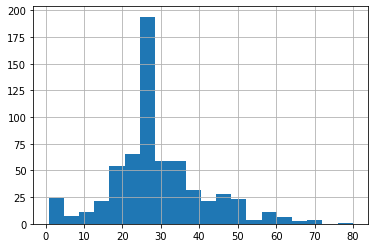

In [8]:
dftrain.age.hist(bins=20)
plt.show()


Observing the correlations between the features in the data set

In [12]:
dftrain[['embark_town', 'survived']].groupby(['embark_town'], as_index=False).mean().sort_values(by='survived',ascending=False)

,embark_town,survived
3,unknown,1.000000
0,Cherbourg,0.593496
1,Queenstown,0.358491
2,Southampton,0.333333


In [13]:
dftrain[['sex', 'survived']].groupby(['sex'], as_index=False).mean().sort_values(by='survived')

,sex,survived
1,male,0.180488
0,female,0.778802


In [14]:
dftrain[['alone', 'survived']].groupby(['alone'], as_index=False).mean().sort_values(by='survived',ascending=False)

,alone,survived
0,n,0.505882
1,y,0.306452


**Conclusion:** 

From the above analysis of data we can say say that the embark town cherbourg has higher survival rate. The female passengers has higher survival rate and also the passengers who are not alone have better survival rate.

In [15]:
dftrain.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [16]:
combine = [dftrain, dfeval]

In [17]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
a=np.unique(dftrain['sex'])
sex_l=enc.fit_transform(dftrain['sex'])
class_l=enc.fit_transform(dftrain['class'])
alone_l=enc.fit_transform(dftrain['alone'])
sex_l1=enc.fit_transform(dfeval['sex'])
class_l1=enc.fit_transform(dfeval['class'])
alone_l1=enc.fit_transform(dfeval['alone'])
emb_l=enc.fit_transform(dftrain['embark_town'])
dftrain['embark_town']=emb_l
emb_l1=enc.fit_transform(dfeval['embark_town'])
dfeval['embark_town']=emb_l1
dftrain['sex']=sex_l
dftrain['class']=class_l
dftrain['alone']=alone_l
dfeval['sex']=sex_l1
dfeval['class']=class_l1
dfeval['alone']=alone_l1
deck_l=enc.fit_transform(dftrain['deck'])
dftrain['deck']=deck_l
deck_l=enc.fit_transform(dfeval['deck'])
dfeval['deck']=deck_l
dfeval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 10 columns):
survived              264 non-null int64
sex                   264 non-null int32
age                   264 non-null float64
n_siblings_spouses    264 non-null int64
parch                 264 non-null int64
fare                  264 non-null float64
class                 264 non-null int32
deck                  264 non-null int32
embark_town           264 non-null int32
alone                 264 non-null int32
dtypes: float64(2), int32(5), int64(3)
memory usage: 15.6 KB


In [18]:
dftrain['AgeBand'] = pd.cut(dftrain['age'], 5)
dftrain[['AgeBand', 'survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,survived
0,"(0.671, 16.6]",0.507937
1,"(16.6, 32.45]",0.357527
2,"(32.45, 48.3]",0.392857
3,"(48.3, 64.15]",0.500000
4,"(64.15, 80.0]",0.125000


In [19]:
for dataset in combine:    
    dataset.loc[ dataset['age'] <= 16.6, 'age'] = 0
    dataset.loc[(dataset['age'] > 16.6) & (dataset['age'] <= 32.45), 'age'] = 1
    dataset.loc[(dataset['age'] > 32.45) & (dataset['age'] <= 48.3), 'age'] = 2
    dataset.loc[(dataset['age'] > 48.3) & (dataset['age'] <= 64.15), 'age'] = 3
    dataset.loc[ dataset['age'] > 64, 'age']=4
dftrain['age']=dftrain['age'].astype(int)
dfeval['age']=dfeval['age'].astype(int)
dftrain.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone,AgeBand
0,0,1,1,1,0,7.2500,2,7,2,0,"(16.6, 32.45]"
1,1,0,2,1,0,71.2833,0,2,0,0,"(32.45, 48.3]"
2,1,0,1,0,0,7.9250,2,7,2,1,"(16.6, 32.45]"
3,1,0,2,1,0,53.1000,0,2,2,0,"(32.45, 48.3]"
4,0,1,1,0,0,8.4583,2,7,1,1,"(16.6, 32.45]"


In [20]:
dftrain['fareb'] = pd.qcut(dftrain['fare'], 4)
dftrain[['fareb', 'survived']].groupby(['fareb'], as_index=False).mean().sort_values(by='fareb', ascending=True)

,fareb,survived
0,"(-0.001, 7.896]",0.182390
1,"(7.896, 15.046]",0.309677
2,"(15.046, 31.388]",0.471338
3,"(31.388, 512.329]",0.589744


In [21]:
dftrain['Age*Class'] = dftrain['age'] * dftrain['class']
dfeval['Age*Class'] = dfeval['age'] * dfeval['class']

for dataset in combine:
    dataset.loc[ dataset['fare'] <= 7.895, 'fare'] = 0
    dataset.loc[(dataset['fare'] > 7.895) & (dataset['fare'] <= 15.046), 'fare'] = 1
    dataset.loc[(dataset['fare'] > 15.046) & (dataset['fare'] <= 31.388), 'fare']   = 2
    dataset.loc[ dataset['fare'] > 31.388, 'fare'] = 3
    dataset['fare'] = dataset['fare'].astype(int)

In [22]:
dftrain['parents']=dftrain['n_siblings_spouses']+dftrain['parch']
dfeval['parents']=dfeval['n_siblings_spouses']+dfeval['parch']
dftrain.pop('AgeBand')
dftrain.pop('fareb')

0        (-0.001, 7.896]
1      (31.388, 512.329]
2        (7.896, 15.046]
3      (31.388, 512.329]
4        (7.896, 15.046]
             ...        
622      (7.896, 15.046]
623      (-0.001, 7.896]
624     (15.046, 31.388]
625     (15.046, 31.388]
626      (-0.001, 7.896]
Name: fareb, Length: 627, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 15.046] < (15.046, 31.388] < (31.388, 512.329]]

**Make some observations on the unfortundate :( data set**

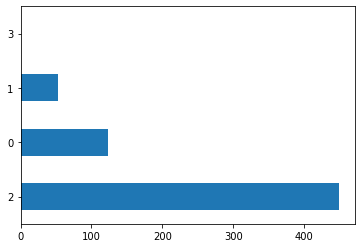

In [23]:
dftrain.embark_town.value_counts().plot(kind='barh')
plt.show()

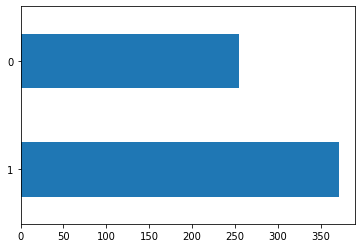

In [21]:
dftrain.alone.value_counts().plot(kind='barh')
plt.show()

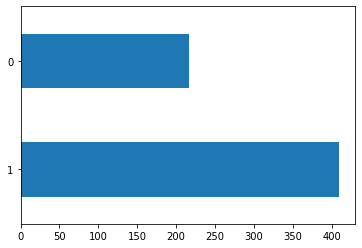

In [24]:
dftrain.sex.value_counts().plot(kind='barh')
plt.show()

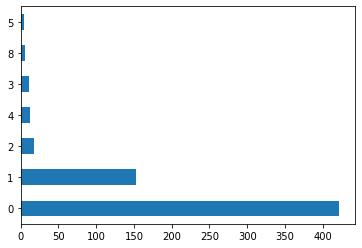

In [25]:
dftrain.n_siblings_spouses.value_counts().plot(kind='barh')
plt.show()

**Survived passengers for each class**

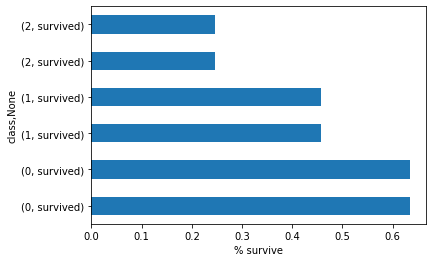

In [26]:
pd.concat([dftrain, y_train], axis=1).groupby('class').survived.mean().plot(kind='barh').set_xlabel('% survive')
plt.show()

**Alright! lets get started! by now you must be wondering how to run learning algorithms on categorial features(we care only about numbers right!). Dataset has categorial features like embark_town, deck, class etc. These are strings but all the algorithms need numericals right. So, we have to change categorial features to numerical features. There are three different ways to do that, here we present one and the easiest way to do that**

In [27]:
dftrain.pop('survived')
dfeval.pop('survived')


0      0
1      0
2      1
3      1
4      1
      ..
259    1
260    0
261    0
262    0
263    1
Name: survived, Length: 264, dtype: int64

In [28]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone,Age*Class,parents
0,1,1,1,0,0,2,7,2,0,2,1
1,0,2,1,0,3,0,2,0,0,0,1
2,0,1,0,0,1,2,7,2,1,2,0
3,0,2,1,0,3,0,2,2,0,0,1
4,1,1,0,0,1,2,7,1,1,2,0


In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(dftrain,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(dftrain.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(10,'Score')) 

                 Specs      Score
9            Age*Class  78.620797
0                  sex  74.066908
4                 fare  41.665232
5                class  39.904449
6                 deck  33.568854
7          embark_town  10.369354
8                alone  10.310269
3                parch   7.629698
2   n_siblings_spouses   3.792283
10             parents   0.075096


In [30]:
dftrain = dftrain.drop(columns="n_siblings_spouses")
dftrain = dftrain.drop(columns="parch")
dfeval = dfeval.drop(columns="n_siblings_spouses")
dfeval = dfeval.drop(columns="parch")
dftrain = dftrain.drop(columns="deck")
dfeval = dfeval.drop(columns="deck")
dftrain.shape

(627, 8)

In [31]:
dftrain.head()

,sex,age,fare,class,embark_town,alone,Age*Class,parents
0,1,1,0,2,2,0,2,1
1,0,2,3,0,0,0,0,1
2,0,1,1,2,2,1,2,0
3,0,2,3,0,2,0,0,1
4,1,1,1,2,1,1,2,0


In [32]:
 #Get dummies
dftrain = pd.get_dummies(dftrain, prefix_sep='_', drop_first=False)
dfeval = pd.get_dummies(dfeval, prefix_sep='_', drop_first=False)
dfeval.shape

(264, 8)

**Here we are dropping one of the features to align training and evaluation datasets, you can use this to drop features you might consider unnecessary**

In [33]:
#dftrain = dftrain.drop(columns="deck_G")
#dftrain = dftrain.drop(columns="deck_unknown")
#dfeval = dfeval.drop(columns="deck_unknown")

**Task 1** : **Decision Tree Classification**

In [34]:
dtc = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
dtc.fit(dftrain, y_train)
y_pred = dtc.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 74.24242424242425 %


C:\Users\91997\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


In [35]:
dtc = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
dtc.fit(dftrain, y_train)
y_pred = dtc.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 80.68181818181817 %


C:\Users\91997\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


In [36]:
dtc = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
dtc.fit(dftrain, y_train)
y_pred = dtc.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 82.57575757575758 %


C:\Users\91997\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


In [37]:
dtc = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
dtc.fit(dftrain, y_train)
y_pred = dtc.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 82.57575757575758 %


C:\Users\91997\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


In [38]:
dtc = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=30,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
dtc.fit(dftrain, y_train)
y_pred = dtc.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 82.57575757575758 %


C:\Users\91997\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


**Task 2** : **Adaptive boosting for Decision Tree Classification**

In [39]:
abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(dftrain, y_train)

#Predict the response for test dataset
y_pred = model.predict(dfeval)

print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 82.95454545454545 %


In [42]:
best_dpth=0
best_n_est=0
best_acc=0
for p in range(15):
    for q in range(20):
        abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=p+1),n_estimators=q+1,
                         learning_rate=1)     
        model = abc.fit(dftrain, y_train)       
        y_pred = model.predict(dfeval)
               
        if metrics.accuracy_score(y_eval, y_pred)*100>best_acc:
            best_acc=metrics.accuracy_score(y_eval, y_pred)*100
            best_dpth=p+1
            best_n_est=q+1

print("Accuracy:",best_acc,"%")
print("depth:",best_dpth)
print("n_est:",best_n_est)

Accuracy: 85.22727272727273 %
depth: 6
n_est: 9


**Task 3**: **Linear SVM classifier**

In [43]:
svclassifier = SVC(kernel='sigmoid',gamma='scale')
svclassifier.fit(dftrain, y_train)
y_pred = svclassifier.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

svclassifier = SVC(kernel='linear',gamma='scale')
svclassifier.fit(dftrain, y_train)
y_pred = svclassifier.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

svclassifier = SVC(kernel='rbf',gamma='scale')
svclassifier.fit(dftrain, y_train)
y_pred = svclassifier.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 50.0 %
Accuracy: 74.24242424242425 %
Accuracy: 79.16666666666666 %


**Now applying adaboost on SVM**

In [44]:
svc=SVC(probability=True, kernel='sigmoid',gamma='scale')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=300, base_estimator=svc,learning_rate=0.01,random_state=42)

# Train Adaboost Classifer
model = abc.fit(dftrain, y_train)

#Predict the response for test dataset
y_pred = model.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 61.36363636363637 %


In [45]:
svc=SVC(probability=True, kernel='linear',gamma='scale')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=300, base_estimator=svc,learning_rate=0.01,random_state=42)

# Train Adaboost Classifer
model = abc.fit(dftrain, y_train)

#Predict the response for test dataset
y_pred = model.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 76.89393939393939 %


In [46]:
svc=SVC(probability=True, kernel='rbf',gamma='scale')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=300, base_estimator=svc,learning_rate=0.01,random_state=42)

# Train Adaboost Classifer
model = abc.fit(dftrain, y_train)

#Predict the response for test dataset
y_pred = model.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 78.03030303030303 %


**Task 4**: **Use SVM classifier with polynomial or radial basis function as kernel and later apply boosting and share your observations**

In [47]:
svclassifier = SVC(gamma=0.1,kernel='poly', degree = 1, shrinking = True)
svclassifier.fit(dftrain, y_train)
y_pred = svclassifier.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 74.24242424242425 %


In [48]:
deg=0
acc=0
for m in range(15):
    svclassifier = SVC(gamma='scale',kernel='poly', degree = m, shrinking = True)
    svclassifier.fit(dftrain, y_train)
    y_pred = svclassifier.predict(dfeval)    
    if metrics.accuracy_score(y_eval, y_pred)*100>acc:
        acc=metrics.accuracy_score(y_eval, y_pred)*100
        deg=m        
print("Accuracy:",acc,"%")
print("degree:",deg)

Accuracy: 82.1969696969697 %
degree: 4


In [49]:
svclassifier = SVC(gamma=0.1,kernel='rbf', degree = 1, shrinking = True)
svclassifier.fit(dftrain, y_train)
y_pred = svclassifier.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 78.4090909090909 %


In [50]:
svclassifier = SVC(C=1,probability=True,gamma=0.1,kernel='rbf', degree = 1, shrinking = True)
abcd =AdaBoostClassifier(n_estimators=80, base_estimator=svclassifier,learning_rate=.01)

# Train Adaboost Classifer
model = abcd.fit(dftrain, y_train)

#Predict the response for test dataset
y_pred = model.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 80.68181818181817 %


**Task 5**: **It's all yours now, get the best possible accuracy in doing so understand the concepts we learnt in class. Hold on fellas, one more thing, don't push yourself so hard to get 100% though!**

In [51]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
random_forest.fit(dftrain, y_train)
y_pred = random_forest.predict(dfeval)

print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 83.33333333333334 %


In [53]:
best_dpth=0
best_n_est=0
best_acc=0
for p in range(20):
    for q in range(50):
        abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=p+1),n_estimators=q+1,
                         learning_rate=1)     
        model = abc.fit(dftrain, y_train)       
        y_pred = model.predict(dfeval)
               
        if metrics.accuracy_score(y_eval, y_pred)*100>best_acc:
            best_acc=metrics.accuracy_score(y_eval, y_pred)*100
            best_dpth=p+1
            best_n_est=q+1

print("Accuracy:",best_acc,"%")
print("depth:",best_dpth)
print("n_est:",best_n_est)

Accuracy: 85.22727272727273 %
depth: 10
n_est: 50


**Observations**:

Using machine learning techniques like decision tree, adaptive boosting and SVM Classification with different kernels. By varying the depth of the tree and number of estimators we optimized the decision tree classification for the titanic dataset. We obtained the aacuracy of 85.22% with depth = 6 and number of estimators = 9. In SVM classification, rbf kernel performs better than other methods and we get an accuracy of 78% after tuning hyperparameters. Further in SVM classifier with polynomial kernel, degree of polynomial was chosen as a hyperparameter getting the degree as 4 and an accuracy of 82.19%.
Finally in task 5 we see the best accuracy as 85.22%, depth = 10 and number of estimators = 50.